<a href="https://colab.research.google.com/github/idrismo45/Human-Resources-Department/blob/main/Copy_of_Human_Resources_Department_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# You have to include the full link to the csv file containing your dataset
employee_df= pd.read_csv('Human_Resources.csv')

In [8]:
employee_df.columns
pd.options.display.max_columns = None

In [9]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [11]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# 35 features in total, each contains 1470 data points

# TASK #3: VISUALIZE DATASET

In [14]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)


In [15]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x == 'Y' else 0)

In [17]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


<Axes: >

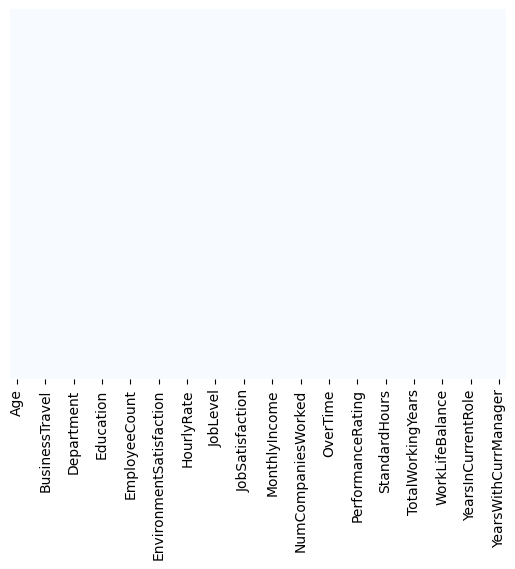

In [18]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

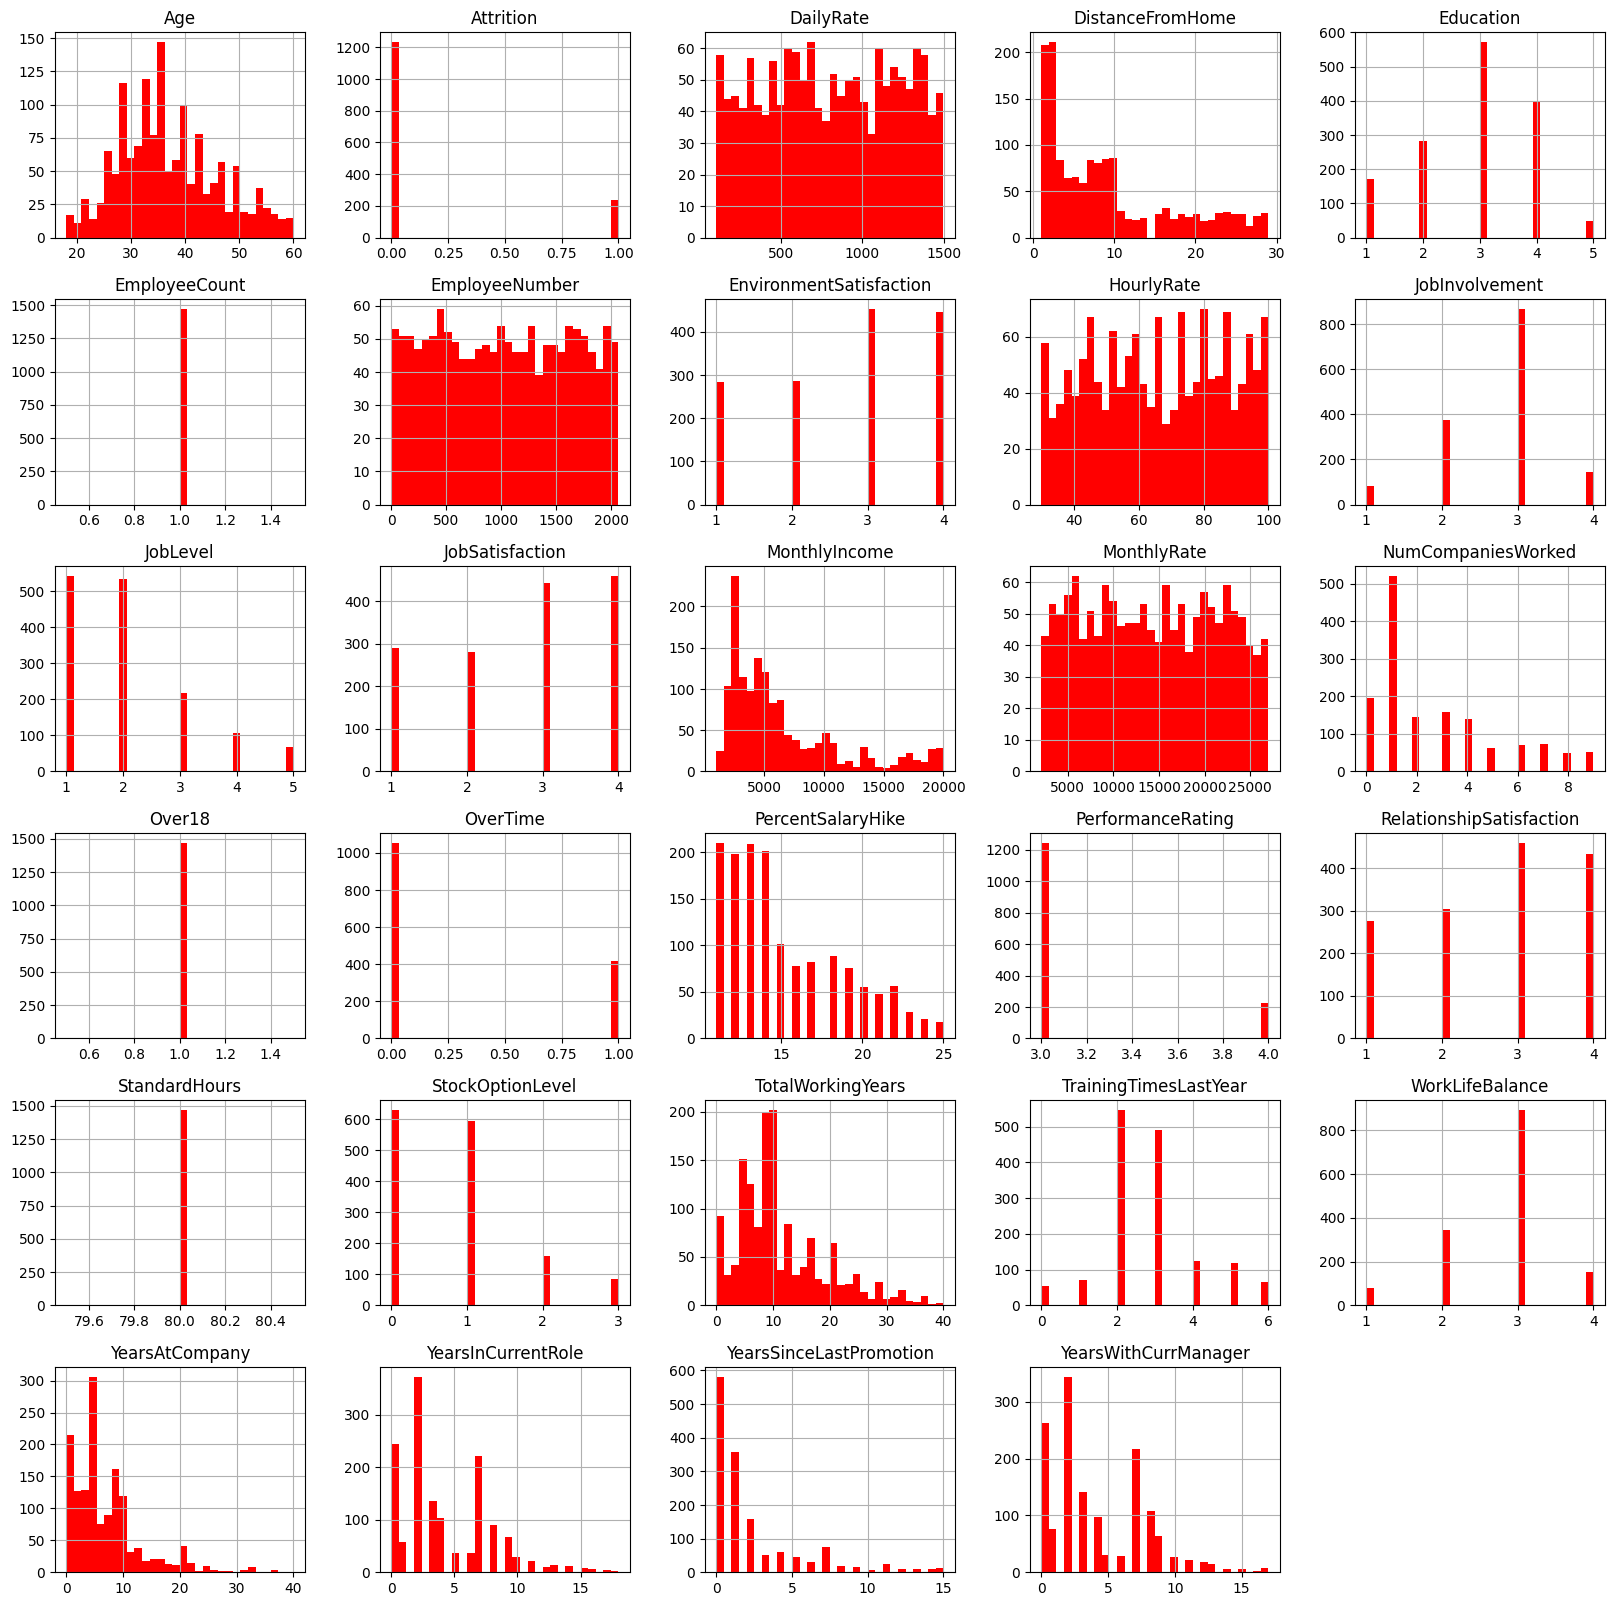

In [19]:
employee_df.hist(bins = 30, figsize = (20,20), color = 'red')

# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [20]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well

employee_df.drop(['EmployeeCount','StandardHours','Over18', 'EmployeeNumber'], axis = 1, inplace = True)


In [21]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [22]:
# Let's see how many employees left the company!
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]


In [23]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset

print('Total = ', len(employee_df))
print('# of employees who left = ', len(left_df))
print('# of employees who stayed = ', len(stayed_df))

percentage_left = (len(left_df)/len(employee_df) * 100)
print(f'% of employees who left = {percentage_left:.2f}%')

percentage_stayed = (len(stayed_df)/len(employee_df) * 100)
print(f'% of employees who stayed = {percentage_stayed:.2f}%')

Total =  1470
# of employees who left =  237
# of employees who stayed =  1233
% of employees who left = 16.12%
% of employees who stayed = 83.88%


In [24]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [25]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [26]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


<Axes: >

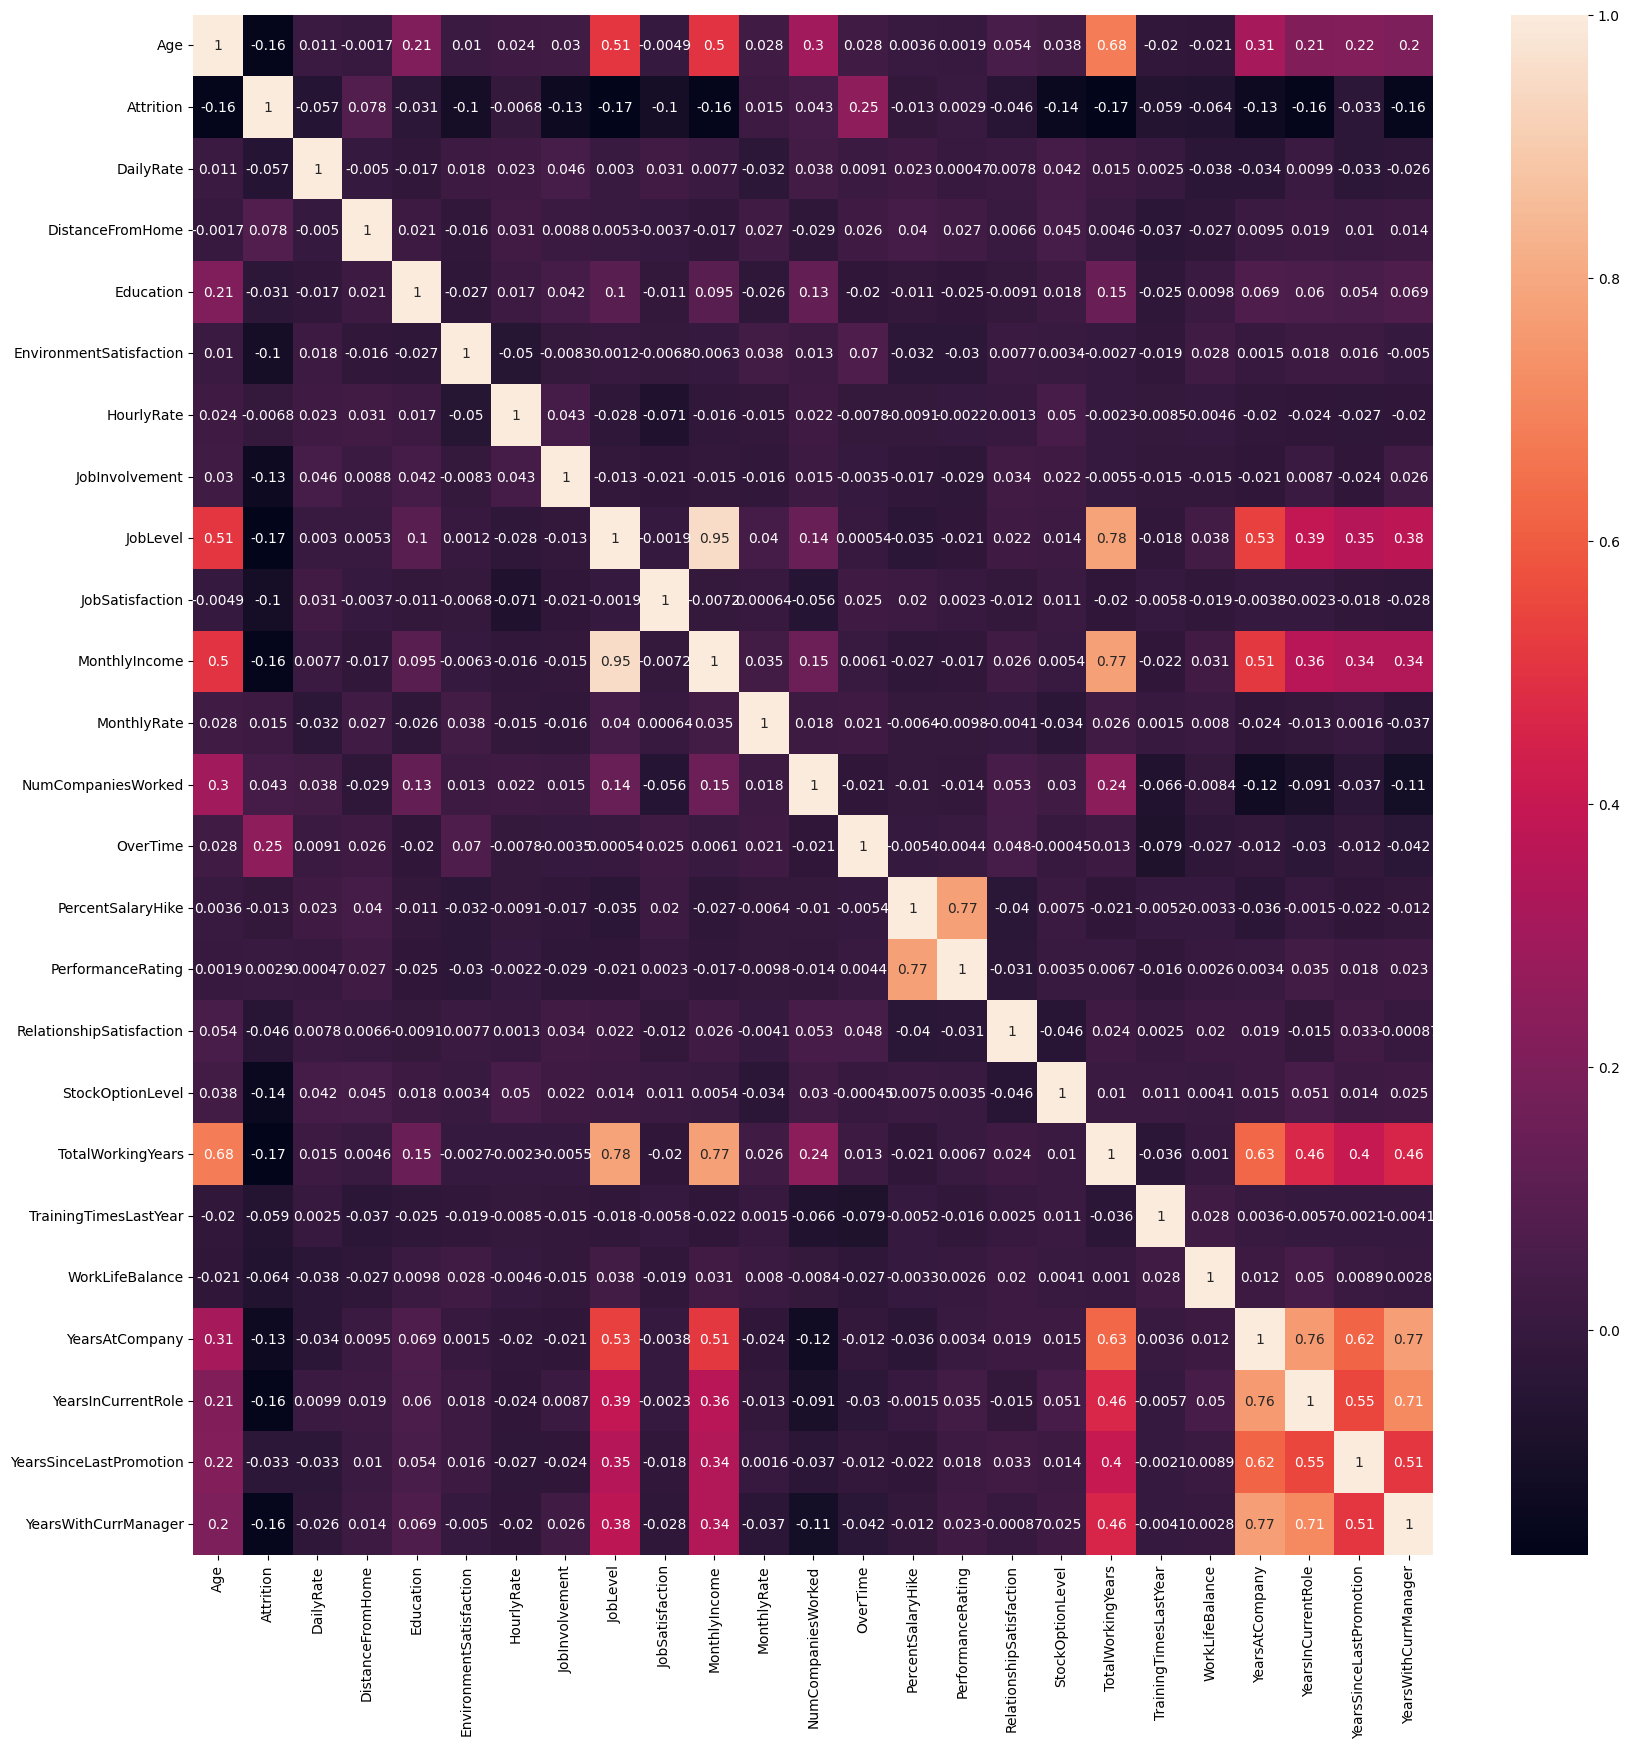

In [27]:
correlations = employee_df.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [28]:

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


<Axes: xlabel='Age', ylabel='count'>

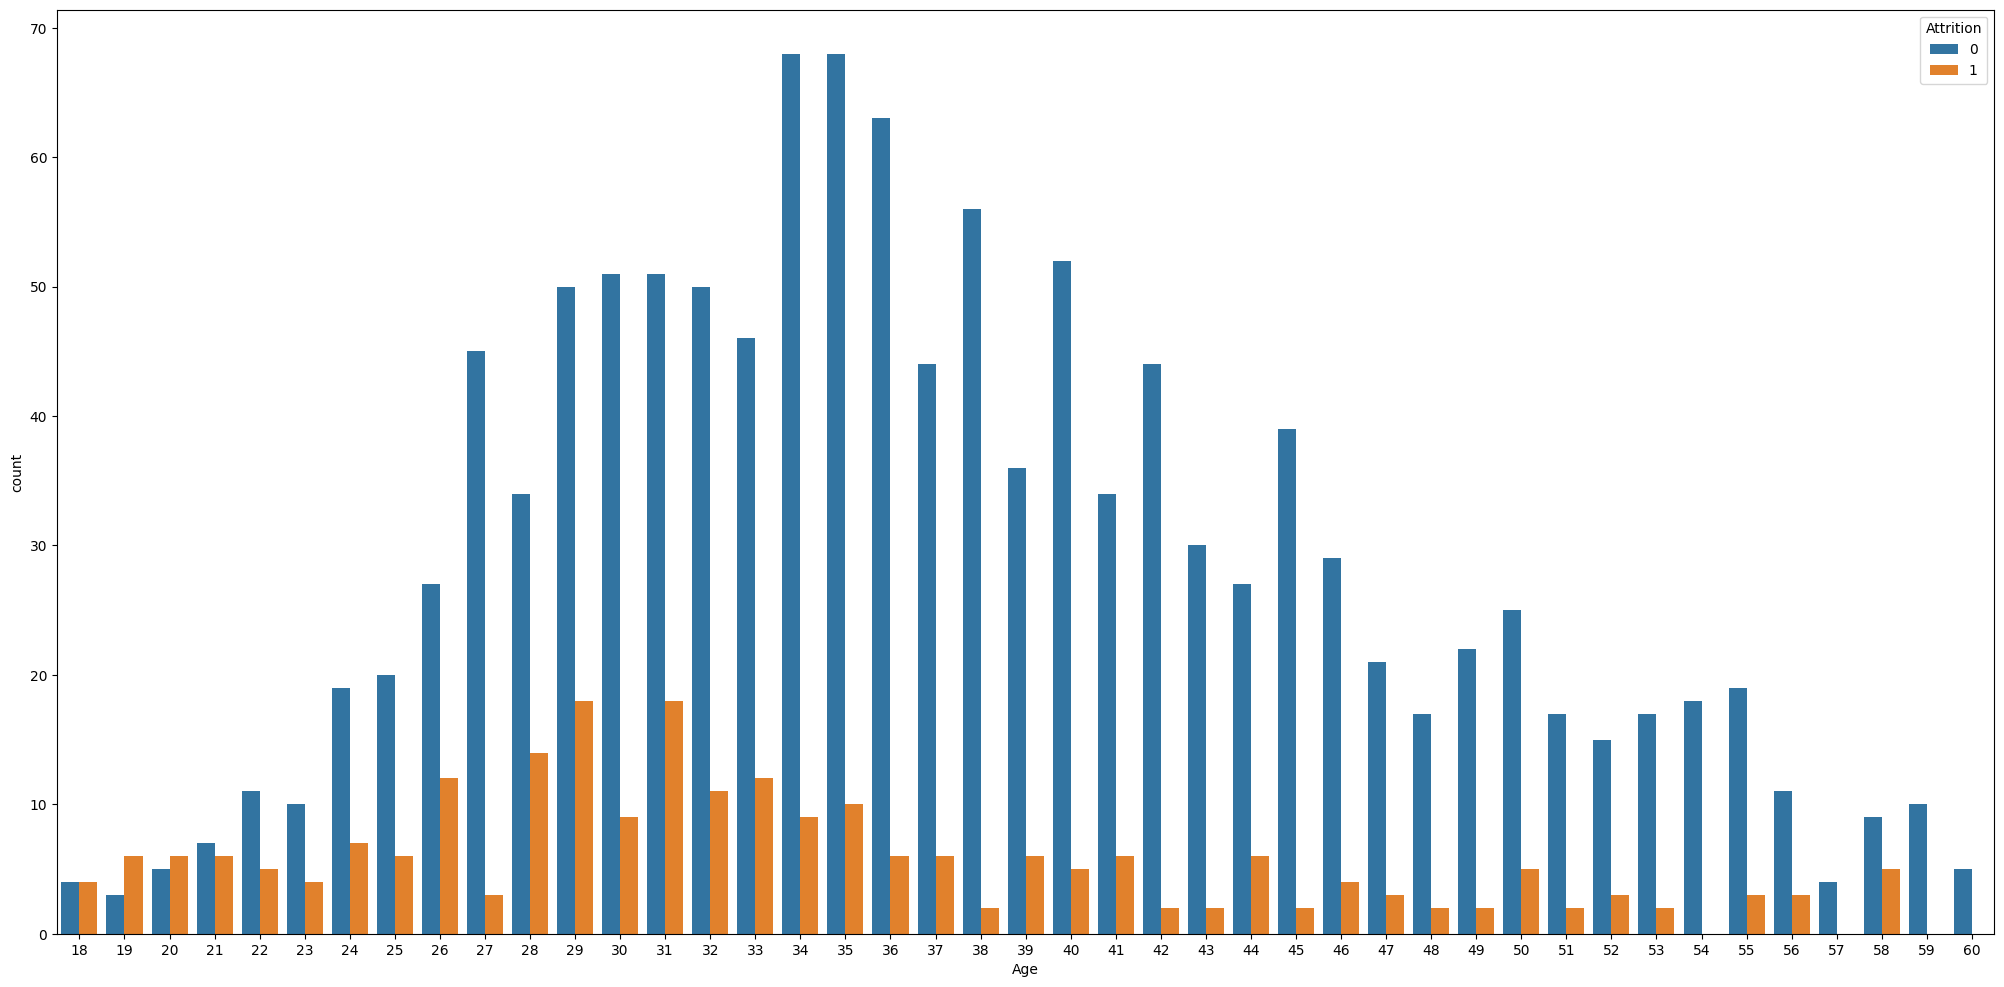

In [29]:
plt.figure(figsize = [25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

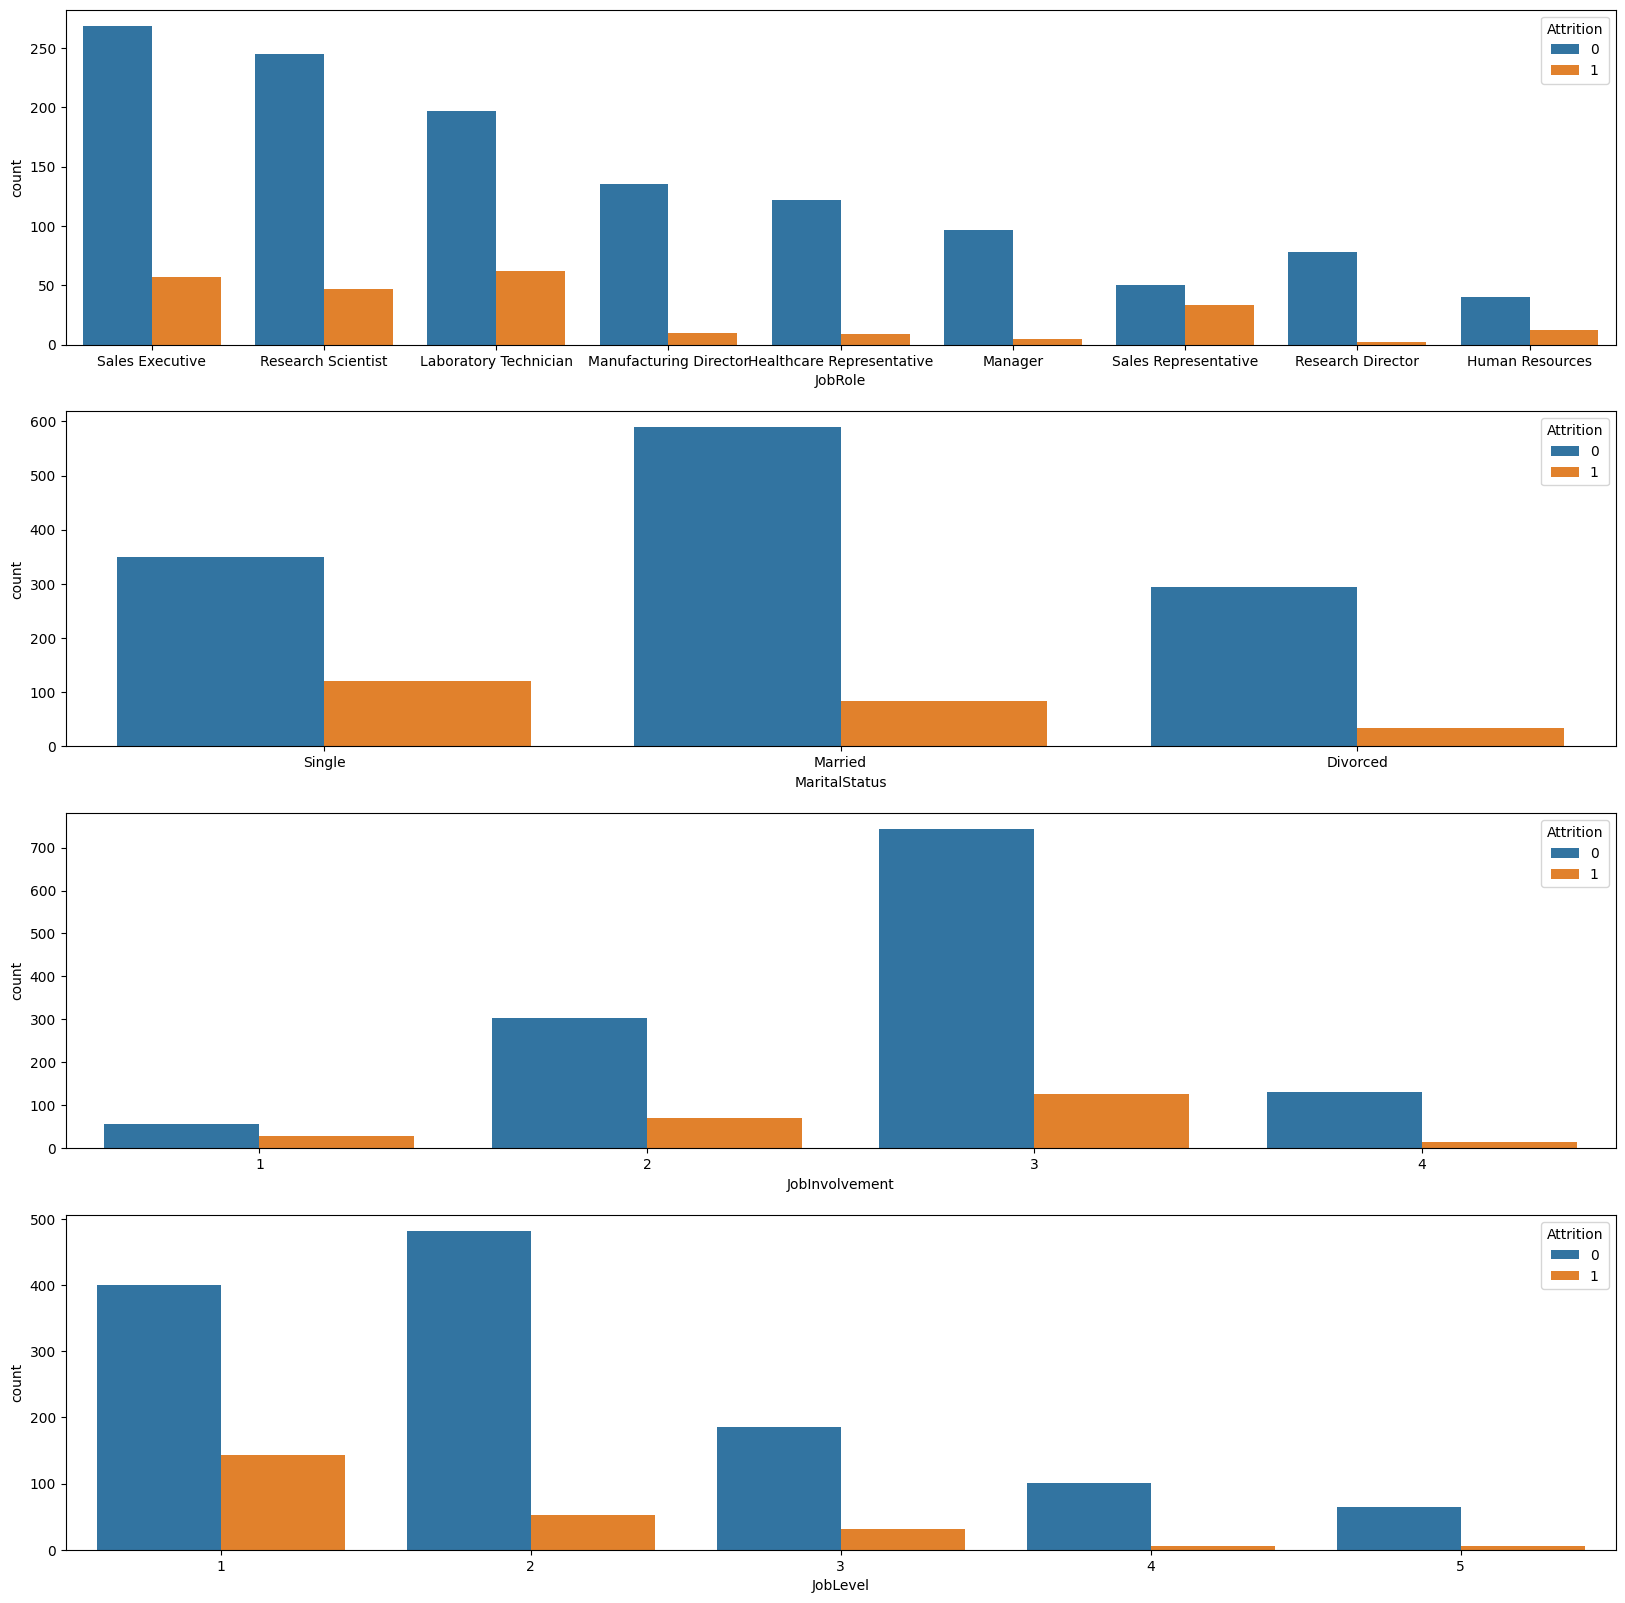

In [30]:
plt.figure(figsize = (20,20))

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

plt.show()


# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

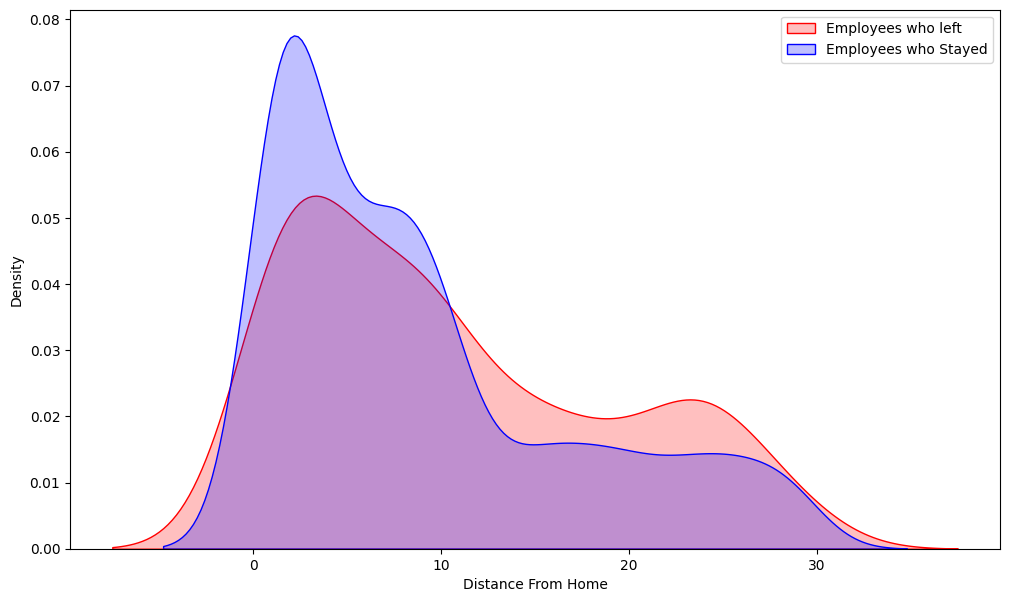

In [31]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable.
# KDE describes the probability density at different values in a continuous variable.

plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', fill = True, color = 'b')

plt.xlabel('Distance From Home')
plt.legend()
plt.show()

In [32]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

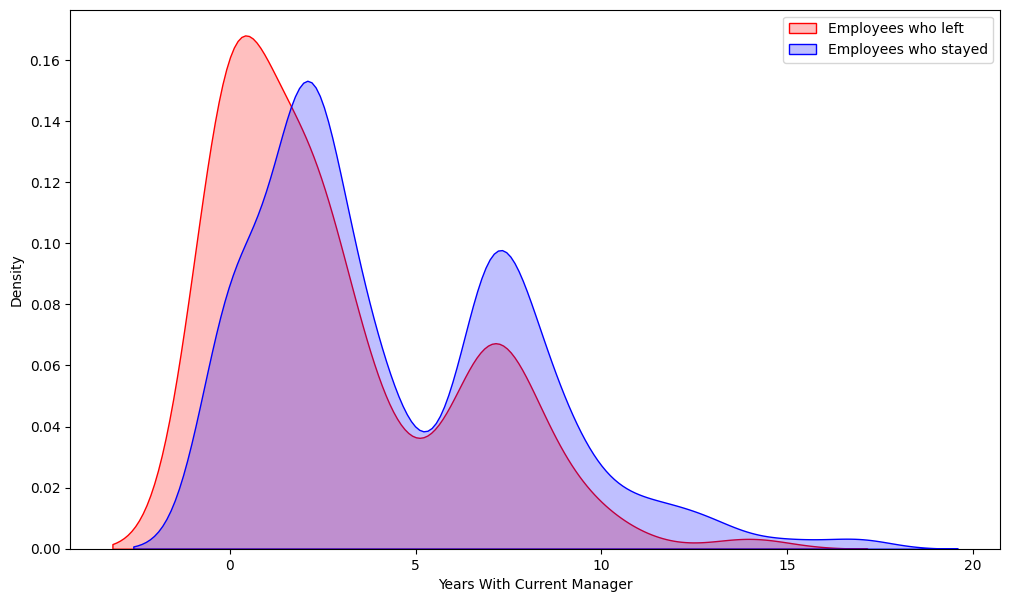

In [33]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('Years With Current Manager')
plt.legend()
plt.show()

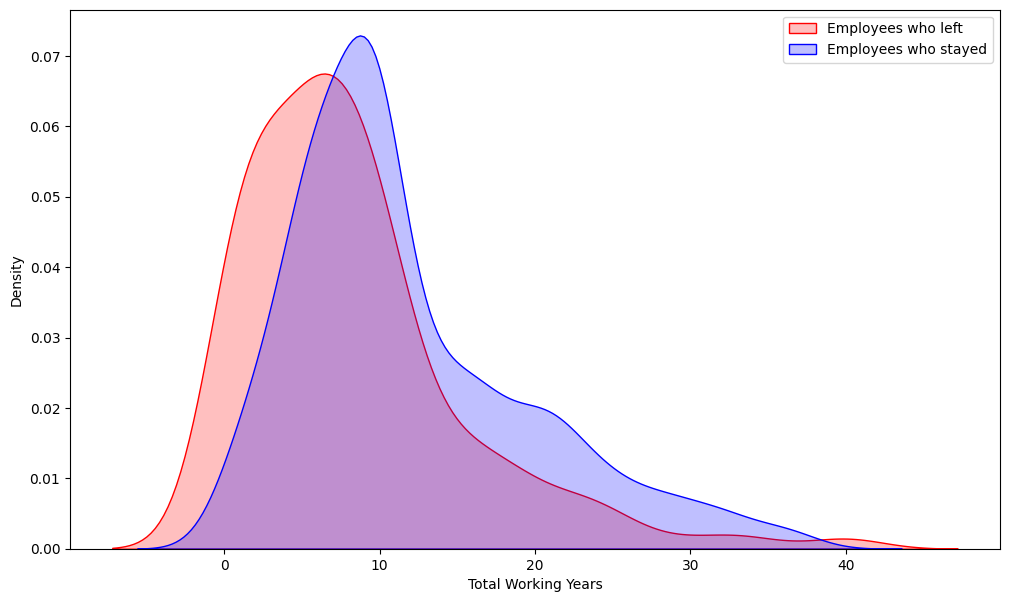

In [34]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', fill = True, color = 'b')

plt.xlabel('Total Working Years')
plt.legend()
plt.show()


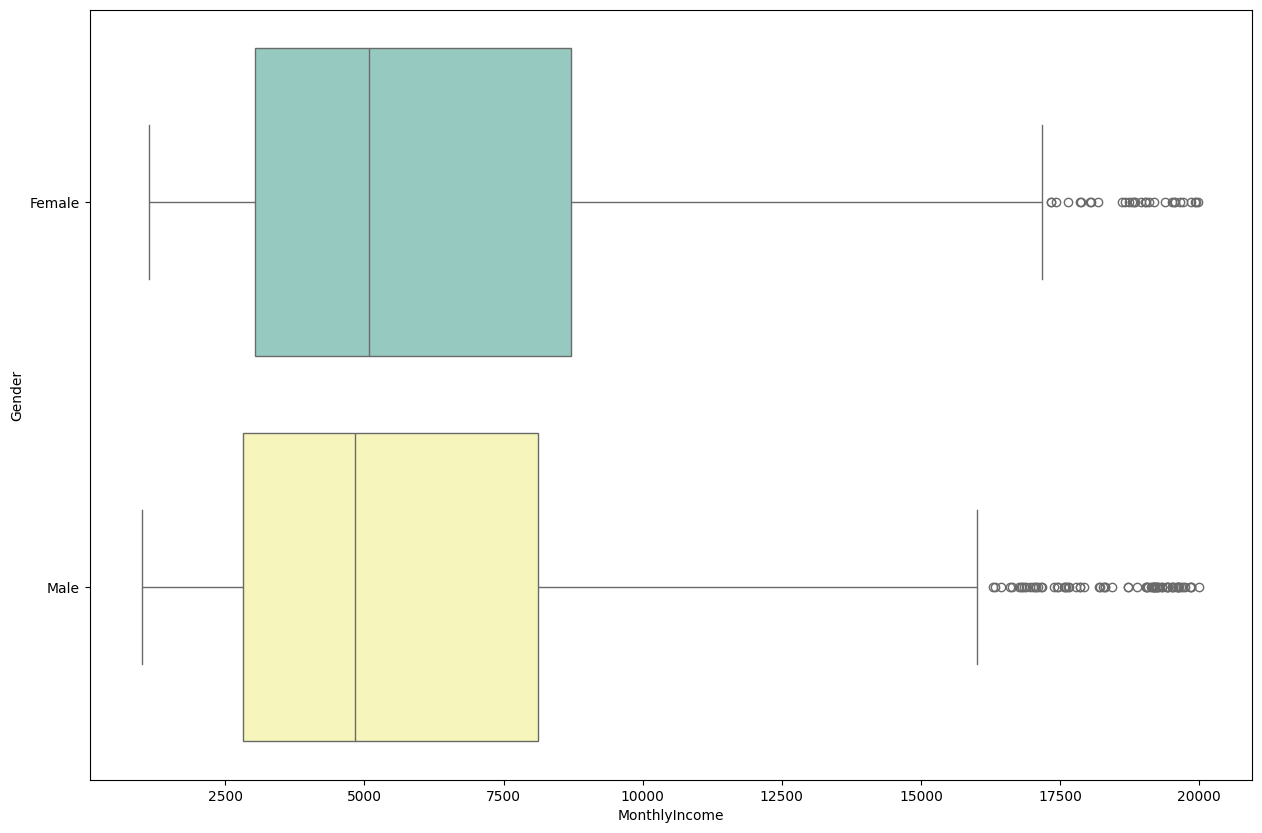

In [35]:
# Let's see the Gender vs. Monthly Income

plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', hue = 'Gender', legend = False, dodge = False, data = employee_df, palette = 'Set3')
plt.show()


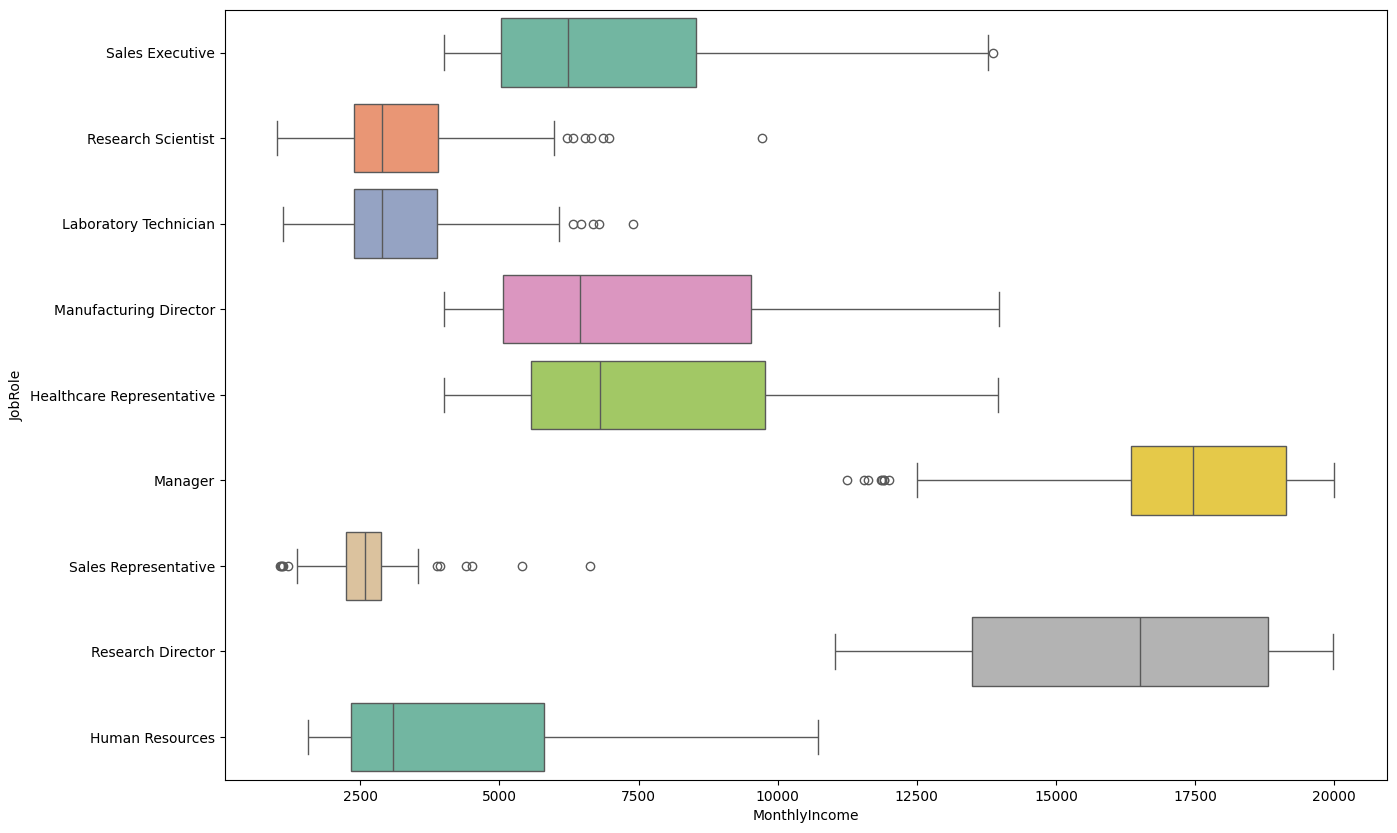

In [36]:
# Let's see the monthly income vs. job role

plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df, hue='JobRole', legend = False, palette='Set2', dodge=False)
plt.show()


# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [91]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [92]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [93]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

X_cat = onehotencoder.fit_transform(X_cat).toarray()

X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [94]:
X_cat.shape

(1470, 26)

In [95]:
X_cat = pd.DataFrame(X_cat)

X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [96]:
# note that we dropped the target 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [97]:
X_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EnvironmentSatisfaction   1470 non-null   int64
 5   HourlyRate                1470 non-null   int64
 6   JobInvolvement            1470 non-null   int64
 7   JobLevel                  1470 non-null   int64
 8   JobSatisfaction           1470 non-null   int64
 9   MonthlyIncome             1470 non-null   int64
 10  MonthlyRate               1470 non-null   int64
 11  NumCompaniesWorked        1470 non-null   int64
 12  OverTime                  1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

In [98]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1470 non-null   float64
 1   1       1470 non-null   float64
 2   2       1470 non-null   float64
 3   3       1470 non-null   float64
 4   4       1470 non-null   float64
 5   5       1470 non-null   float64
 6   6       1470 non-null   float64
 7   7       1470 non-null   float64
 8   8       1470 non-null   float64
 9   9       1470 non-null   float64
 10  10      1470 non-null   float64
 11  11      1470 non-null   float64
 12  12      1470 non-null   float64
 13  13      1470 non-null   float64
 14  14      1470 non-null   float64
 15  15      1470 non-null   float64
 16  16      1470 non-null   float64
 17  17      1470 non-null   float64
 18  18      1470 non-null   float64
 19  19      1470 non-null   float64
 20  20      1470 non-null   float64
 21  21      1470 non-null   float64
 22  

In [99]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

X_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [78]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         1470 non-null   float64
 1   1                         1470 non-null   float64
 2   2                         1470 non-null   float64
 3   3                         1470 non-null   float64
 4   4                         1470 non-null   float64
 5   5                         1470 non-null   float64
 6   6                         1470 non-null   float64
 7   7                         1470 non-null   float64
 8   8                         1470 non-null   float64
 9   9                         1470 non-null   float64
 10  10                        1470 non-null   float64
 11  11                        1470 non-null   float64
 12  12                        1470 non-null   float64
 13  13                        1470 non-null   float64
 14  14      

In [100]:
# Convert all column names to strings
X_all.columns = X_all.columns.astype(str)

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [103]:
y = employee_df['Attrition']

y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)


Artificial Neural Networks (ANNs) are inspired by the way the human brain works. They consist of a network of neurons that communicate with each other, mimicking the structure and function of the brain to solve problems.

## **Key Concepts:**

1. **Neurons and Layers**:
   - ANNs are made up of layers of interconnected neurons. Each neuron receives inputs, processes them, and passes the result to the next layer.
   - These networks can be used for tasks like classification, regression, and even image recognition.

2. **Weights**:
   - The connections between neurons have "weights" that determine the strength of the signal passed between neurons. These weights capture the "intelligence" of the network.
   - During training, the values of these weights are adjusted to make the network more accurate.

3. **How it Works**:
   - The inputs are multiplied by the weights (matrix multiplication), summed up, and passed through an **activation function** to decide whether and how strongly the neuron should fire.
   - There are various activation functions, like ReLU or Sigmoid, that help the network handle complex patterns.

4. **Training**:
   - The network is trained by adjusting the weights to minimize the error in the output. This is done by feeding it input data and comparing its predictions with the correct output.
   - Over time, with enough data, the network learns to map inputs to outputs with increasing accuracy by optimizing the weights.

5. **Goal**:
   - The ultimate goal is to find the best set of weights that result in the most accurate predictions. This process is called **training** or **learning**.

### In Summary:
ANNs are a powerful AI tool made up of layers of neurons that are connected by adjustable weights. By feeding data through the network and optimizing these weights, ANNs can learn to solve complex problems, whether it’s classifying images, predicting outcomes, or recognizing patterns in data.

---


![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

**Linear Regression:**

In linear regression, we aim to predict a dependent variable (y) based on an independent variable (x). For example, predicting revenue based on temperature.
The relationship between the variables is represented by the equation:
y = mx + b,
where m is the slope (how much y changes as x changes) and b is the intercept (the value of y when x is zero).
This method is great for predicting continuous values like sales, temperature, or income.

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

**Logistic Regression:**

Logistic regression, despite its name, is not a regression technique. It's actually used for classification—predicting binary outcomes (e.g., pass/fail, win/lose).
Let's say we want to predict whether a student will pass or fail an exam based on how long they study:
If a student studies for just 1 hour, they might fail (class 0).
But if they study for 3 hours, they may pass (class 1).
We plot the hours studied on the x-axis and whether students passed or failed on the y-axis (0 or 1).

** **

**Why Logistic Regression?**

Using linear regression here isn’t ideal because it's hard to fit a straight line to classification data (with values like 0 and 1).
Instead, logistic regression applies a sigmoid function on top of the linear equation. The sigmoid function is:
p(x) = 1 / (1 + e^(-y)),
where y = b0 + b1 * x.
This gives us an S-shaped curve, which maps any input to a probability between 0 and 1.

** **

**How Logistic Regression Works:**

Logistic regression outputs the probability that a given input belongs to class 1 (e.g., pass) or class 0 (e.g., fail). It handles classification problems by converting the linear line into probability values.
For example, if the output probability is greater than 0.5, we classify it as 1 (pass). If it’s less than 0.5, we classify it as 0 (fail). This sets a threshold for classification.

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

** **

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

Here's a clearer and simpler version of your explanation on decision trees and random forest classifiers (RFC):

---

### Decision Trees:
- **Decision trees** are like a series of yes/no questions that help us make decisions. At each step, the data is split based on a specific condition.
- For example, if we're analyzing customers at a bank:
  - We could start by asking, **"Does the customer have more than $1 million in savings?"**
    - If **yes**, they belong to one category.
    - If **no**, they belong to another category.
  
- We continue splitting the data with more questions, like:
  - **"Is the customer older than 45?"**
    - If **yes**, they are in class 1 (maybe eligible for retirement).
    - If **no**, they are in class 0 (not eligible for retirement).

- This process continues until the tree reaches a decision (class 0 or class 1), helping us predict the outcome.

---

### Random Forest Classifier (RFC):
- A **random forest classifier (RFC)** improves upon decision trees by creating **many decision trees** instead of just one. It’s an **ensemble algorithm**.
- Each tree in the forest is built on a randomly selected subset of the training data. After each tree makes its prediction, we combine the predictions through a **majority vote**.
  
  - For example:
    - If **Tree 1** predicts class 1, and
    - **Tree 2** predicts class 0,
    - **Tree 3** predicts class 1,
    
    The majority vote (class 1) is the final prediction.
  
- By averaging the predictions of multiple decision trees, **random forests** provide more accurate and stable results than a single decision tree. This reduces the risk of overfitting (when a model performs well on training data but poorly on unseen data).

---

In summary, **decision trees** split data based on conditions to make predictions, while a **random forest** combines the decisions from multiple trees to make a more reliable prediction through majority voting.

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [106]:
X_train.shape

(1102, 50)

In [107]:
X_test.shape

(368, 50)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [109]:
y_pred = model.predict(X_test)

In [110]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [123]:
# Testing Set Performance

from sklearn.metrics import confusion_matrix, classification_report

print(f'Accuracy = {100* accuracy_score(y_test, y_pred):.2f}%')


Accuracy = 86.96%


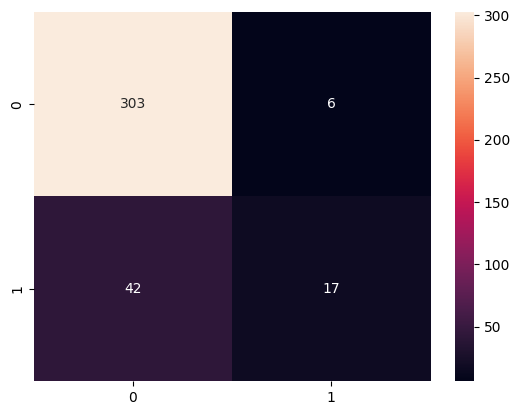

In [124]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')  # 'g' prevents scientific notation
plt.show()

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       309
           1       0.74      0.29      0.41        59

    accuracy                           0.87       368
   macro avg       0.81      0.63      0.67       368
weighted avg       0.86      0.87      0.84       368



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [126]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
y_pred = model.predict(X_test)

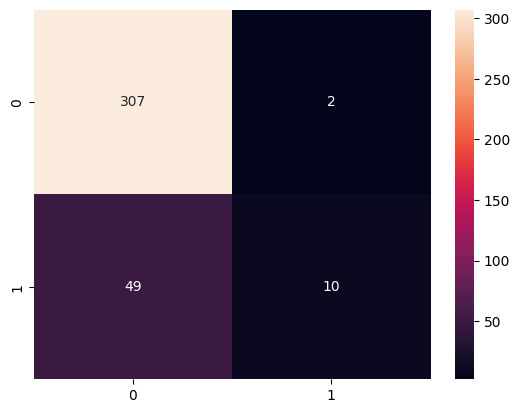

In [131]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.83      0.17      0.28        59

    accuracy                           0.86       368
   macro avg       0.85      0.58      0.60       368
weighted avg       0.86      0.86      0.82       368



# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [134]:
import tensorflow as tf

# Initialize a Sequential model
model = tf.keras.models.Sequential()

# Add the first hidden layer with 500 units and ReLU activation function
# input_shape specifies the shape of the input data (50 features in this case)
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))

# Add the second hidden layer with 500 units and ReLU activation function
model.add(tf.keras.layers.Dense(units=500, activation='relu'))

# Add the third hidden layer with 500 units and ReLU activation function
model.add(tf.keras.layers.Dense(units=500, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function
# This is used for binary classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │          25,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 527,001 (2.01 MB)

 Trainable params: 527,001 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# Compile the model specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [137]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7215 - loss: 0.5080
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8448 - loss: 0.3553
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8843 - loss: 0.3375
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9087 - loss: 0.2647
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8947 - loss: 0.2780 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9184 - loss: 0.2225
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9380 - loss: 0.1861
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9360 - loss: 0.1743
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9593 - loss: 0.1229
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9704 - loss: 0.0789
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9809 - loss: 0.0577
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accura

In [138]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary outcomes using a threshold of 0.5
y_pred = (y_pred > 0.5)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [142]:
# Optional: if you want to see the first few predictions
print(y_pred[:10])

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]]


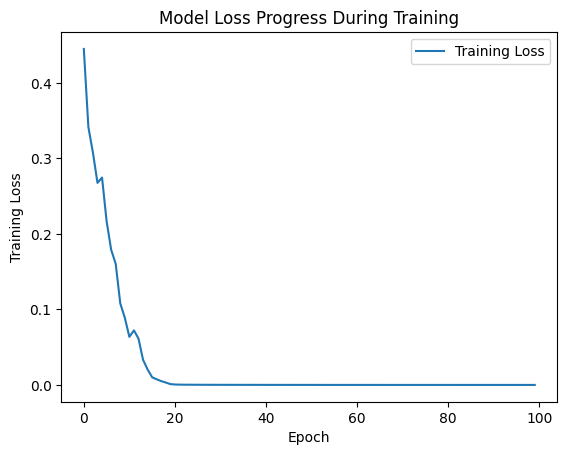

In [141]:
plt.plot(epochs_hist.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

plt.show()

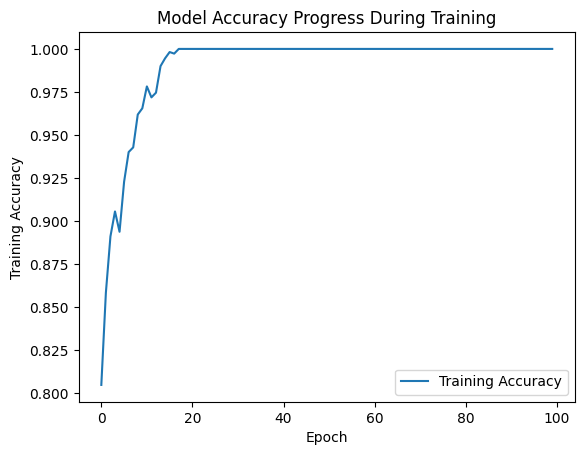

In [143]:
plt.plot(epochs_hist.history['accuracy'])

plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

plt.show()

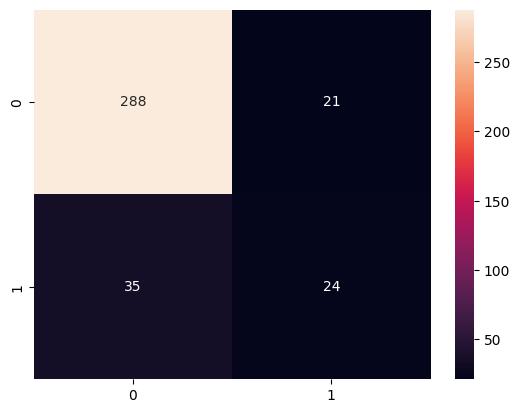

In [145]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       309
           1       0.53      0.41      0.46        59

    accuracy                           0.85       368
   macro avg       0.71      0.67      0.69       368
weighted avg       0.83      0.85      0.84       368



** **

In [41]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
